In [103]:
import numpy as np
from matplotlib import pyplot as plt

In [335]:
c = 1.
h = 1.
Cu = 0.5
L = 3000.
Nx = int(L / h)
Nt = int(100 / h / Cu)
dt = Cu * h / c
x = np.linspace(0, 3000, Nx)

In [345]:
def init(x0, x1):
    U = np.zeros([Nt, Nx])
    U[0, x0:x1] = np.abs(np.sin((x[x0:x1] - x[x0]) * np.pi / (x[x1] - x[x0])) ** 6)
    return U

In [346]:
def first_order(U, Nt, Cu):
    for n in range(0, Nt - 1):
        U[n + 1, 1:] = U[n, 1:] - Cu * (U[n, 1:] - U[n, :-1])
        #U[n + 1, 0] = U[n, 0]
    return U

In [347]:
x0 = int(Nx / 2) - int(20 / h)
x1 = x0 + int(40 / h)
U = init(x0, x1)
U_n = first_order(U, Nt, Cu)
#plt.plot(x, U_n[0, :]);
#plt.plot(x, U_n[-1,:]);

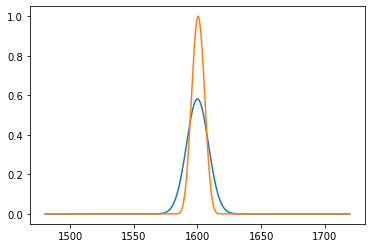

In [348]:
U_ex = init(x0 + int(Nt * Cu), x1 + int(Nt * Cu))
err = np.sqrt(np.sum((U_n[-1, x0 + int(Nt * Cu): x1 + int(Nt * Cu)] - U_ex[0, x0 + int(Nt * Cu): x1 + int(Nt * Cu)]) ** 2 * h))
plt.plot(x[x0 + int(Nt * Cu)-100: x1 + int(Nt * Cu) + 100], U_n[-1, x0 + int(Nt * Cu) - 100: x1 + int(Nt * Cu) + 100]);
plt.plot(x[x0 + int(Nt * Cu)-100: x1 + int(Nt * Cu) + 100], U_ex[0, x0 + int(Nt * Cu) - 100: x1 + int(Nt * Cu) + 100]);
#plt.plot(x, U_n[-1])
#plt.plot(x, U_ex[0])

In [340]:
print(err)

1.2286697714049004


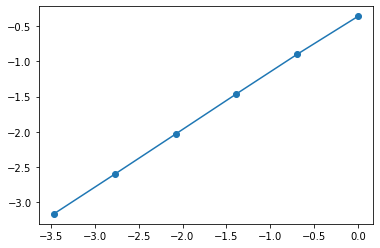

In [333]:
errs = np.array([0.042199, 0.07413, 0.131, 0.2318, 0.4071, 0.6978])
plt.plot(np.log([0.03125, 0.0625, 0.125, 0.25, 0.5, 1.]), np.log(errs), '-o');

In [334]:
print(np.log(errs[1] / errs[0]) / np.log(2.))

0.8128486999467367
